In [ ]:
%matplotlib inline

In [ ]:
!pip install mne no

# Анализ ЭЭГ с помощью MNE-Python


In [ ]:
import os
import numpy as np
import mne

## Загрузка данных

Структуры данных MNE-Python основаны на формате файла FIF из
Neuromag.
Функция mne.datasets.sample.data_path автоматически
загружает набор данных


In [ ]:
!wget https://files.osf.io/v1/resources/rxvq7/providers/osfstorage/59c0e26f9ad5a1025c4ab159?version=5&action=download&direct

/bin/bash: direct: command not found
--2021-03-19 21:19:17--  https://files.osf.io/v1/resources/rxvq7/providers/osfstorage/59c0e26f9ad5a1025c4ab159?version=5
Resolving files.osf.io (files.osf.io)... 35.186.214.196
Connecting to files.osf.io (files.osf.io)|35.186.214.196|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://storage.googleapis.com/cos-osf-prod-files-us/9ff8d7fa34338fd12fba4010f11656d74c73df001d7ce5deca249cd7dd304577?response-content-disposition=attachment%3B%20filename%3D%22MNE-sample-data-processed.tar.gz%22%3B%20filename%2A%3DUTF-8%27%27MNE-sample-data-processed.tar.gz&GoogleAccessId=files-us%40cos-osf-prod.iam.gserviceaccount.com&Expires=1616188819&Signature=CMmk5JPdxcYa43hIrOKW1hGohU4kXGbRbCUvxAGeL0zKtPFb4XTccAoSicVdCN0vHl6rs8IYw3gkJiOm4EiYMwaSsp4mJu2sIRmP4F54NjB%2FFd%2Bfhhb4sYNR%2FKKX7TqwIn%2Bwmu9IBm55N40gt7ieRzVAM4u%2F90RR1rvERrhbw9Gm1L7%2F2wiFTlAfeoAm5NKCc%2BcHh2cVzF2Z9RQPS9vgvJp%2F61zhrGIlkaxeHWRbiTU0TuqLxFrxiAnU29P1aySPajrEyj3tJ0

In [ ]:
#https://mne.tools/dev/auto_examples/visualization/my_report.html
#https://mne.tools/stable/index.html


#from google.colab import files
#uploaded = files.upload()
#sample_data_folder = mne.datasets.sample.data_path()
#sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample', 'sample_audvis_filt-0-40_raw.fif')
#raw = mne.io.read_raw_fif('sample_data_raw_file')
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

NameError: ignored

В добавление к информации, отображаемой во время загрузки, мы можем получить представление об основных
деталях объекта `~ mne.io.Raw`;
Структура данных info отслеживает расположение каналов
`` chs '', показывает, что
MNE-Python обнаруживает разные типы датчиков и обрабатывает каждый соответствующим образом.



In [ ]:
print(raw)
print(raw.info)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.3 MB, data not loaded>
<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 GRAD, 102 MAG, 9 STIM, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


Объекты `~ mne.io.Raw` также имеют несколько встроенных методов; например спектральную плотность мощности (PSD) для каждого типа датчика с
`~ mne.io.Raw.plot_psd`, а также график необработанных следов датчика с
`~ mne.io.Raw.plot`. На графике PSD мы рисуем только частоты ниже 50 Гц.
(поскольку наши данные фильтруются нижними частотами с частотой 40 Гц).


Effective window size : 13.639 (s)
Effective window size : 13.639 (s)
Effective window size : 13.639 (s)


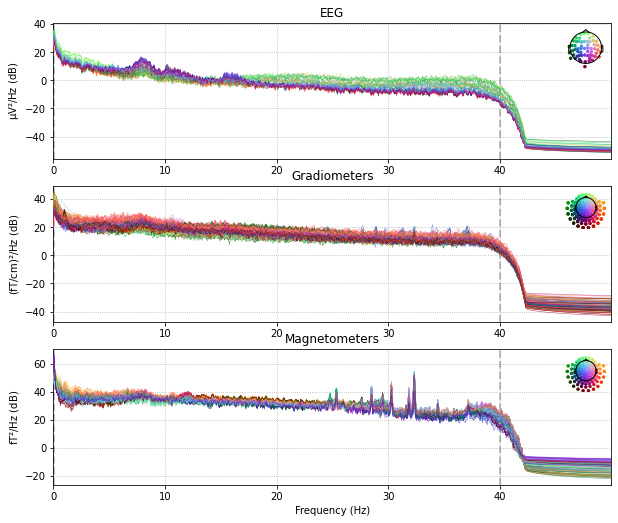

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


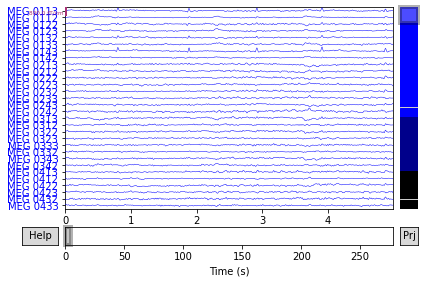

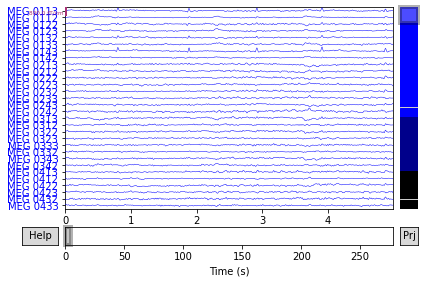

In [ ]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


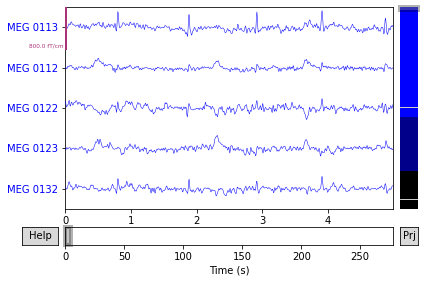

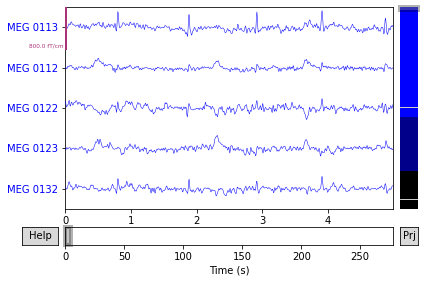

In [ ]:
#raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=5)

Effective window size : 13.639 (s)
Effective window size : 13.639 (s)
Effective window size : 13.639 (s)


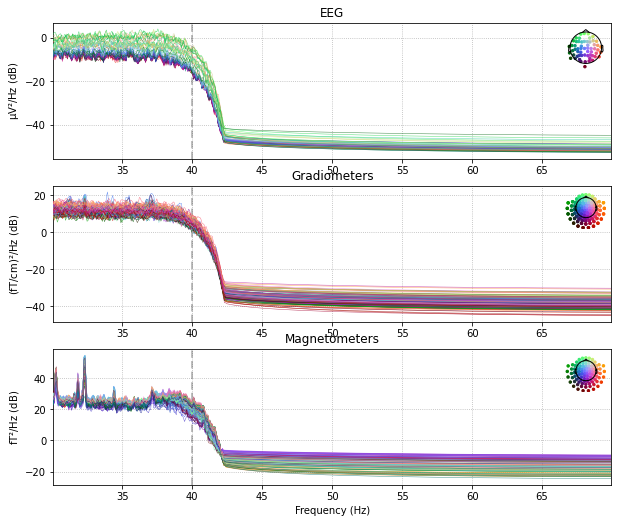

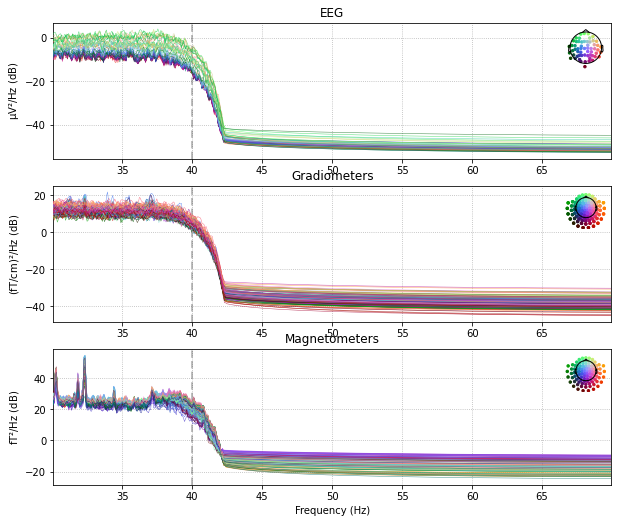

In [ ]:
raw.plot_psd(fmin=30, fmax=70)
#raw.plot(duration=5, n_channels=5)

## Предобработка

MNE-Python поддерживает различные подходы и методы предварительной обработки.
(фильтрация Максвелла, проекция сигнального пространства, анализ независимых компонент,
фильтрация, понижающая дискретизация)
Выполним анализ независимых компонент или ICA
(`~ mne.preprocessing.ICA`)


Fitting ICA to data using 364 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 20 components
Fitting ICA took 2.0s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


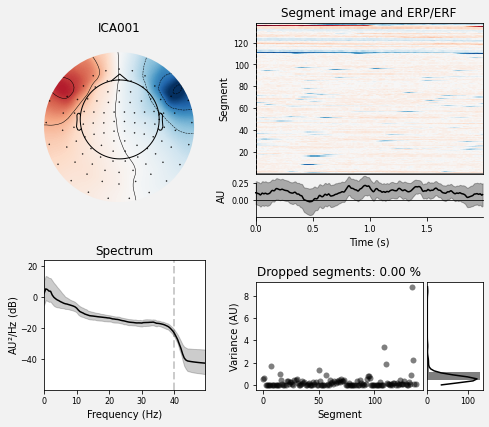

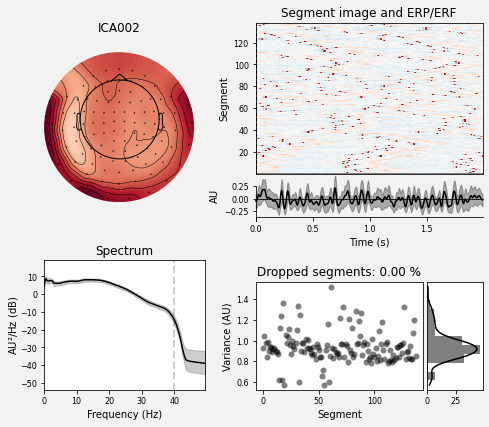

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [ ]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]
ica.plot_properties(raw, picks=ica.exclude)

Передаем компоненты которые мы хотим удалить (для понижения размерности)
в качестве параметра exclude, а затем применяем ICA к необработанному сигналу.
Метод `~ mne.preprocessing.ICA.apply` требует, чтобы необработанные данные были загружены в
память (по умолчанию она считывается с диска только по мере необходимости), поэтому будем использовать
сначала `~ mne.io.Raw.load_data`. Также сделаем копию файла `~ mne.io.Raw`, чтобы мы могли сравнить сигнал до и после удаления артефакта




Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Transforming to ICA space (20 components)
Zeroing out 2 ICA components


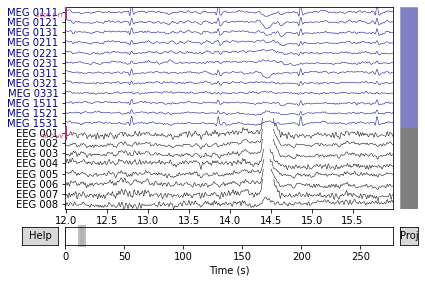

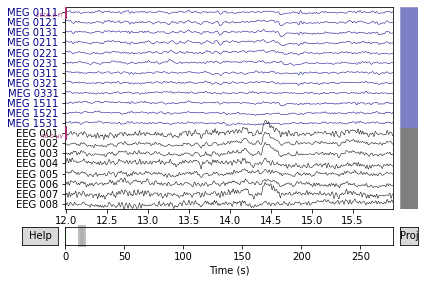

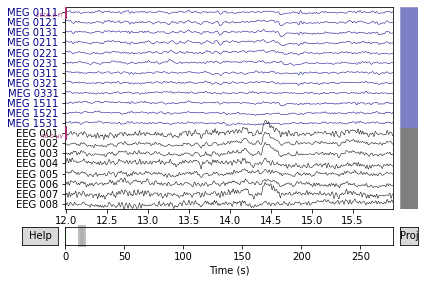

In [ ]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

# покажем несколько фронтальных каналов, чтобы наглядно проиллюстрировать удаление артефакта
chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
       'MEG 0311', 'MEG 0321', 'MEG 0331', 'MEG 1511', 'MEG 1521', 'MEG 1531',
       'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006',
       'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)

## События

Образец набора данных включает несколько электрических сигналов, посылаемых компьютером доставки стимулов (как
короткие сдвиги постоянного тока / прямоугольные импульсы). Эти импульсы используются для обозначения начала стимула, тип стимула и реакция участника (нажатие кнопки).

In [ ]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:7])

319 events found
Event IDs: [ 1  2  3  4  5 32]
[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]
 [7506    0    3]
 [7612    0    1]]


Результирующий массив событий состоит из 3 столбцов:  номер образца в первом столбце и id события
в последнем столбце; средний столбец игнорируется. Мы можем представить словарь событий, который отображает
id экспериментальных условий или событий. В этом наборе данных
отображение выглядит так:

1 - слуховой раздражитель (тон) в левое ухо
2 - слуховой раздражитель (тон) в правое ухо
3 - зрительный стимул (шахматная доска) в левом поле зрения
4 - зрительный стимул (шахматная доска) в правом поле зрения
5 - смайлик  
32 - нажать кнопку


In [ ]:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'smiley': 5, 'buttonpress': 32}

Словари событий, используются при извлечении эпох из
непрерывных данных; символ  /  в ключах словаря позволяет объединять
через условия, запрашивая их частичные дескрипторы (т. е.
при запросе auditory будут выбраны все эпохи с идентификаторами событий 1 и 2;
запрос  left  выберет все эпохи с идентификаторами событий 1 и 3). Также есть удобная
Функция `~ mne.viz.plot_events` для визуализации распределения событий
во время записи. Здесь также будем использовать атрибут `~ mne.Info`, чтобы получить
частоту дискретизации записи


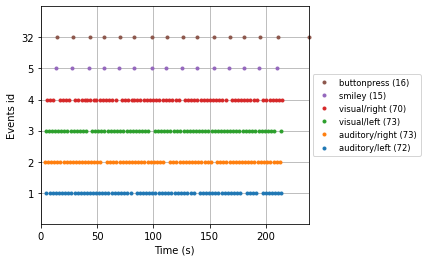

In [ ]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

## Эпохи

Объект `~ mne.io.Raw` и массив событий - это то что нужно для
создания объекта `~ mne.Epochs` с помощью класса` ~ mne.Epochs`. Ограничения качества данных:
отклоняем любую эпоху, когда амплитуда сигнала от пика до пика превышает разумные
ограничения для этого типа канала. Это делается с помощью словаря отклонения.



In [ ]:
reject_criteria = dict(mag=4000e-15,
                       grad=4000e-13,
                       eeg=150e-6,
                       eog=250e-6)

Передадим словарь событий как параметр event_id,  tmin и tmax (начало и конец эпохи).



In [ ]:
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5,
                    reject=reject_criteria, preload=True)

Not setting metadata
Not setting metadata
319 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Loading data for 319 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EEG : ['EEG 008']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
10 bad epochs dropped


Объединим левые и правые стимулы, чтобы можно было сравнить
слуховые и зрительные реакции. Чтобы наши сигналы не смещались влево или
право,будем использовать `~ mne.Epochs.equalize_event_counts`



In [ ]:
conds_we_care_about = ['auditory/left', 'auditory/right',
                       'visual/left', 'visual/right']
epochs.equalize_event_counts(conds_we_care_about)
aud_epochs = epochs['auditory']
vis_epochs = epochs['visual']
del raw, epochs

Dropped 7 epochs: 121, 195, 258, 271, 273, 274, 275


Not setting metadata
Not setting metadata
136 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
136 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


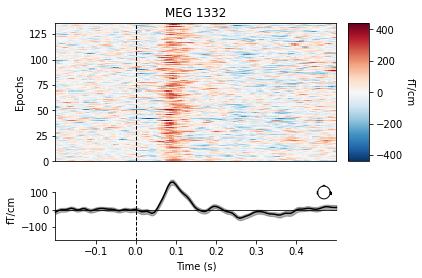

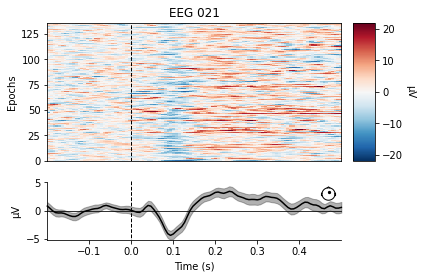

[<Figure size 432x288 with 4 Axes>, <Figure size 432x288 with 4 Axes>]

In [ ]:
aud_epochs.plot_image(picks=['MEG 1332', 'EEG 021'])

## Частотно-временной анализ




Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>
No baseline correction applied


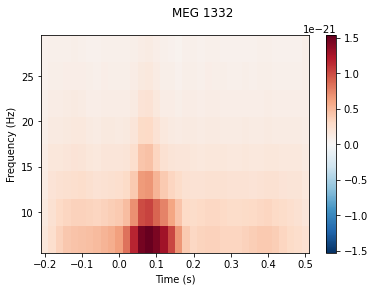

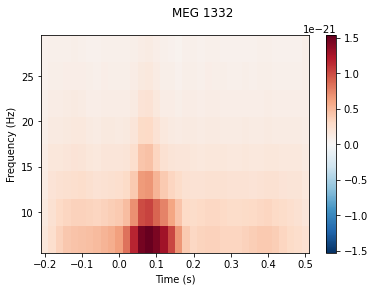

In [ ]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(aud_epochs, n_cycles=2, return_itc=False,
                                      freqs=frequencies, decim=3)
power.plot(['MEG 1332'])

## Оценка результатов

Получим оценку вызванных реакций на слуховые и зрительные стимулы с помощью
усреднения по состояниям.
метод `~ mne.Epochs.average` для объекта` ~ mne.Epochs`,
ф-я `mne.viz` для сравнения глобальной мощности поля
для каждого типа сенсора `~ mne.Evoked`:



Multiple channel types selected, returning one figure per type.
combining channels using "gfp"
combining channels using "gfp"


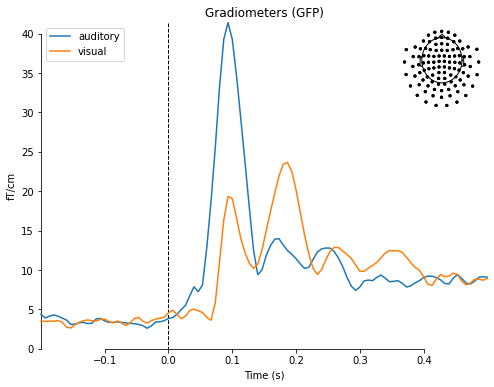

combining channels using "gfp"
combining channels using "gfp"


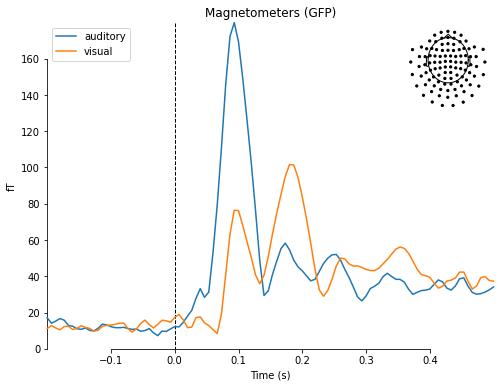

combining channels using "gfp"
combining channels using "gfp"


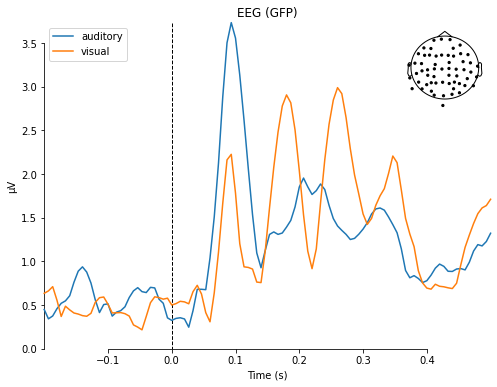

[<Figure size 576x432 with 2 Axes>,
 <Figure size 576x432 with 2 Axes>,
 <Figure size 576x432 with 2 Axes>]

In [ ]:
aud_evoked = aud_epochs.average()
vis_evoked = vis_epochs.average()

mne.viz.plot_compare_evokeds(dict(auditory=aud_evoked, visual=vis_evoked),
                             legend='upper left', show_sensors='upper right')

Мы также можем получить более подробное представление о каждом объекте `~ mne.Evoked`, используя другие
методы построения графиков, напрмер `~ mne.Evoked.plot_joint` или
`~ mne.Evoked.plot_topomap`.



Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


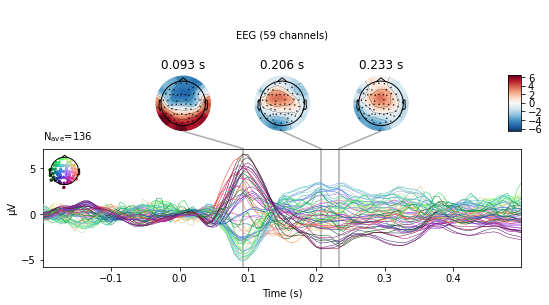

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


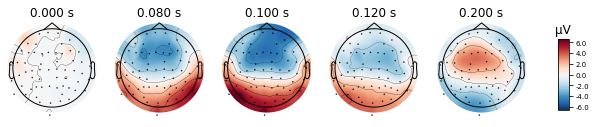

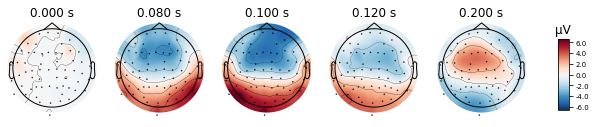

In [ ]:
aud_evoked.plot_joint(picks='eeg')
aud_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg')

Объекты также можно комбинировать, чтобы показать контраст между состояниями,
используя функцию `mne.combine_evoked`. Передадим weights = [1, -1] . Построим разностную волну
на каждом датчике, используя `~ mne.Evoked.plot_topo`:


Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


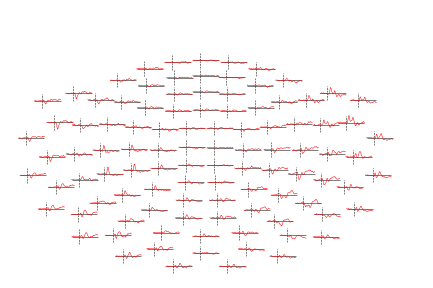

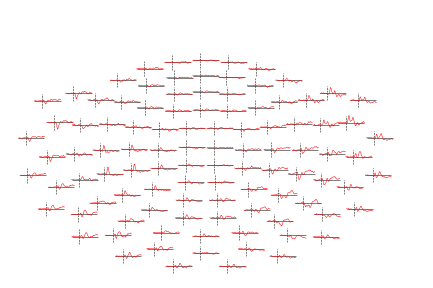

In [ ]:
evoked_diff = mne.combine_evoked([aud_evoked, vis_evoked], weights=[1, -1])
evoked_diff.pick_types(meg='mag').plot_topo(color='r', legend=False)